In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_colwidth',-1)

#sns.set_style("whitegrid")
#sns.set_context('notebook')
plt.rcParams["figure.figsize"] = (12,4)
%matplotlib inline

In [73]:
#!pip install awesome-slugify

In [75]:
import os
from slugify import slugify

def save_img(title):
    name = slugify(title,to_lower=True)
    path = os.path.join('img/',name+'.png')
    print(f'saved to {path}')
    plt.savefig(path, bbox_inches='tight')

In [2]:
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from tools.cli import load_stif,build_nb

In [4]:
df = pd.read_feather('../data/processed/nb-validation-2017.feather')

In [5]:
df.shape

(654978, 5)

In [6]:
df.head()

,kind,date,stop,value,sem
0,autre titre,2017-03-17,barbes-rochechouart,349,s1-2017
1,navigo,2017-03-17,mairie de montreuil,16509,s1-2017
2,imagine r,2017-03-17,mairie de saint-ouen,1807,s1-2017
3,autre titre,2017-03-17,mairie des lilas,172,s1-2017
4,tst,2017-03-17,mairie des lilas,542,s1-2017


## Quick look

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654978 entries, 0 to 654977
Data columns (total 5 columns):
kind     654978 non-null object
date     654978 non-null datetime64[ns]
stop     654978 non-null object
value    654978 non-null int64
sem      654978 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 25.0+ MB


In [8]:
df.describe()

,value
count,654978.000000
mean,1513.947806
std,3614.809873
min,5.000000
25%,121.000000
50%,313.000000
75%,1193.000000
max,115600.000000


In [9]:
df.head()

,kind,date,stop,value,sem
0,autre titre,2017-03-17,barbes-rochechouart,349,s1-2017
1,navigo,2017-03-17,mairie de montreuil,16509,s1-2017
2,imagine r,2017-03-17,mairie de saint-ouen,1807,s1-2017
3,autre titre,2017-03-17,mairie des lilas,172,s1-2017
4,tst,2017-03-17,mairie des lilas,542,s1-2017


In [10]:
df.date.min()

Timestamp('2017-01-01 00:00:00')

In [11]:
df.date.max()

Timestamp('2017-12-31 00:00:00')

## Check assumption

In [12]:
df.date.max()

Timestamp('2017-12-31 00:00:00')

In [13]:
df.date.min()

Timestamp('2017-01-01 00:00:00')

According to [wikipedia](https://fr.wikipedia.org/wiki/M%C3%A9tro_de_Paris#Lignes_en_service) there is around 50 to 100 million people that get in the subway each year

In [14]:
#millions of validated ticket for 2017
yearly =df.value.sum()/10**6
assert yearly >600
assert yearly <1200 
print(yearly)

991.602506


In [15]:
#nb de stations
assert df.stop.unique().shape[0] == 301

## Overall traffic

In [16]:
monthly = df.groupby('date').sum().resample('1m').sum()['value']

In [17]:
monthly.index = [elt.month for elt in monthly.index]

In [18]:
import matplotlib.pyplot as plt
style='fivethirtyeight'
plt.style.use(style)


saved to img/monthly-traveler.png


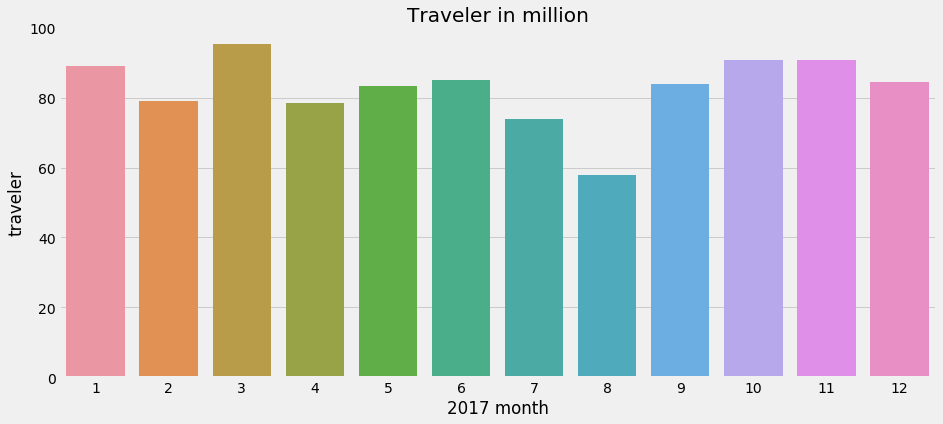

In [76]:
ax= sns.barplot(x=monthly.index,
                y=monthly.div(10**6),
               )
ax.set_xlabel('2017 month')
ax.set_ylabel('traveler')
ax.set_title('Traveler in million')
save_img('Monthly traveler')

In [20]:
month_pct = monthly.pct_change()

Text(0.5,1,'Change month over month')

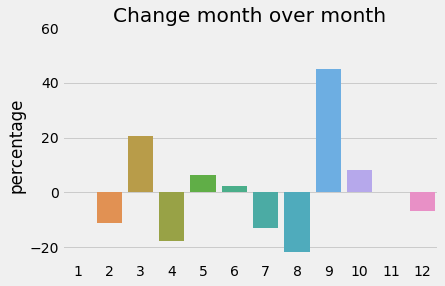

In [21]:
ax= sns.barplot(x=month_pct.index,
                y=month_pct*100,
               )
ax.set_ylim([month_pct.min()-25,60])
ax.set_ylabel('percentage')
ax.set_title('Change month over month')

In [22]:
df.head()

,kind,date,stop,value,sem
0,autre titre,2017-03-17,barbes-rochechouart,349,s1-2017
1,navigo,2017-03-17,mairie de montreuil,16509,s1-2017
2,imagine r,2017-03-17,mairie de saint-ouen,1807,s1-2017
3,autre titre,2017-03-17,mairie des lilas,172,s1-2017
4,tst,2017-03-17,mairie des lilas,542,s1-2017


/home/khalid/.pyenv/versions/3.6.2/envs/paris_metro/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


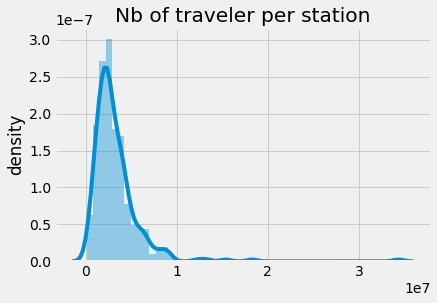

In [23]:
ax = sns.distplot(df.groupby('stop').sum())
ax.set_title('Nb of traveler per station')
x = ax.set_ylabel('density')

## Ticket type

In [78]:
df.head()

,kind,date,stop,value,sem
0,autre titre,2017-03-17,barbes-rochechouart,349,s1-2017
1,navigo,2017-03-17,mairie de montreuil,16509,s1-2017
2,imagine r,2017-03-17,mairie de saint-ouen,1807,s1-2017
3,autre titre,2017-03-17,mairie des lilas,172,s1-2017
4,tst,2017-03-17,mairie des lilas,542,s1-2017


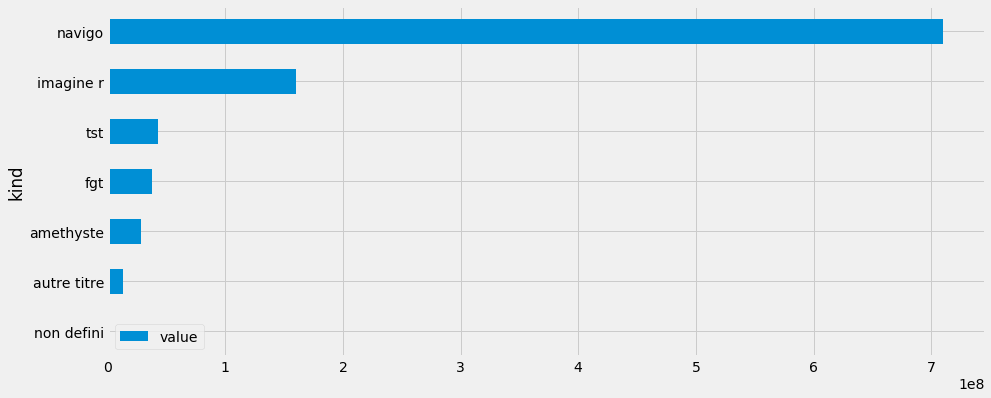

In [89]:
df.groupby('kind').sum().sort_values('value').plot(kind='barh')

## Stop per line

As I'm interested in what is happening on the metro platform, I'll approximate the number of passenger.

Here we'll consider that every line is equally likely to be chosen by a traveler 
which more or less hold according to this [wikipedia draft](https://fr.wikipedia.org/wiki/Liste_des_lignes_de_m%C3%A9tro_parisiennes_par_fr%C3%A9quentation)

In [24]:
df_nb_validation = pd.read_feather('../data/processed/nb-validation-2017.feather')


In [25]:
#add_profile(df_nb_validation,df_vac)

In [26]:
from tools.build_features import augment_df_nb,read_vacances,add_profile
import pandas as pd

df_nb_validation = pd.read_feather('../data/processed/nb-validation-2017.feather')
stop_meta = pd.read_feather('../data/processed/meta_stop.feather')
#convert to smooth merging with nb_validation
stop_meta[['stop_lat','stop_lon']] = stop_meta[['stop_lat','stop_lon']].apply(lambda x:x.astype(float))
df_vac = read_vacances('../data/external/fr-en-calendrier-scolaire.csv')
#augment the initial dataset with useful information
dataset = augment_df_nb(df_nb_validation,stop_meta,df_vac)
#FIXME: should be done in upstream
dataset.profile = dataset.profile.str.lower()

In [27]:
#sanity check
nb_kind = 6
bercy_nb_lines = 2
assert dataset.query('stop=="bercy" and date =="2017-01-10" ').shape[0] == nb_kind*bercy_nb_lines

In [28]:
dataset.head()

,kind,date,stop,sem,profile,nbline,traffic_line,is_end,line,stop_lat,stop_lon
0,navigo,2017-03-17,mairie de montreuil,s1-2017,johv,1,16509.0,True,9,48.862283,2.441847
1,autre titre,2017-03-17,mairie de montreuil,s1-2017,johv,1,264.0,True,9,48.862283,2.441847
2,imagine r,2017-03-17,mairie de montreuil,s1-2017,johv,1,3283.0,True,9,48.862283,2.441847
3,tst,2017-03-17,mairie de montreuil,s1-2017,johv,1,1457.0,True,9,48.862283,2.441847
4,amethyste,2017-03-17,mairie de montreuil,s1-2017,johv,1,518.0,True,9,48.862283,2.441847


In [29]:
order = ['1', '2', '3','3B', '4', '5', '6', '7','7B', '8', '9', '10', '11', '12', '13', '14']
mcolor = {'1': 'F5C300',
  '10': 'DCB12B',
  '11': 'B5946C',
  '12': '9DBB9D',
  '13': '99D4DF',
  '14': '9C81B6',
  '2': '98B3DA',
  '3': 'BBBC64',
  '3B': '99D4DF',
  '4': 'D083B2',
  '5': 'F5AC7D',
  '6': 'C4DA99',
  '7': 'F2A5BD',
  '7B': 'C4DA99',
  '8': 'CEADCF',
  '9': 'D6C900'}
colors = ['#'+mcolor[k] for k in order]

saved to img/daily-passenger-distribution.png


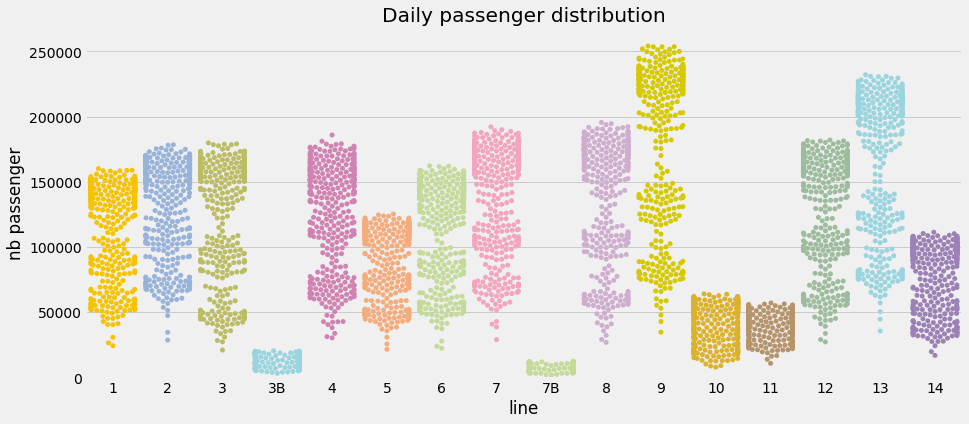

In [77]:
from tools.cli import map_jour_fr
plt.rcParams["figure.figsize"] = (14,6)

palette = sns.color_palette(colors)
line_day = (dataset.groupby(['date','line','profile'])
            .sum()['traffic_line']
            .reset_index()
            .replace({'profile':{k.lower():v for k,v in map_jour_fr.items()}})
           .rename(columns={'traffic_line':'nb passenger'})
           .dropna())
ax=sns.swarmplot(data=line_day,
              order=order,
              palette=palette,
            x='line',
            y='nb passenger')
ax.axis(ymin=0)
title='Daily passenger distribution'
ax.set_title(title)
save_img(title)

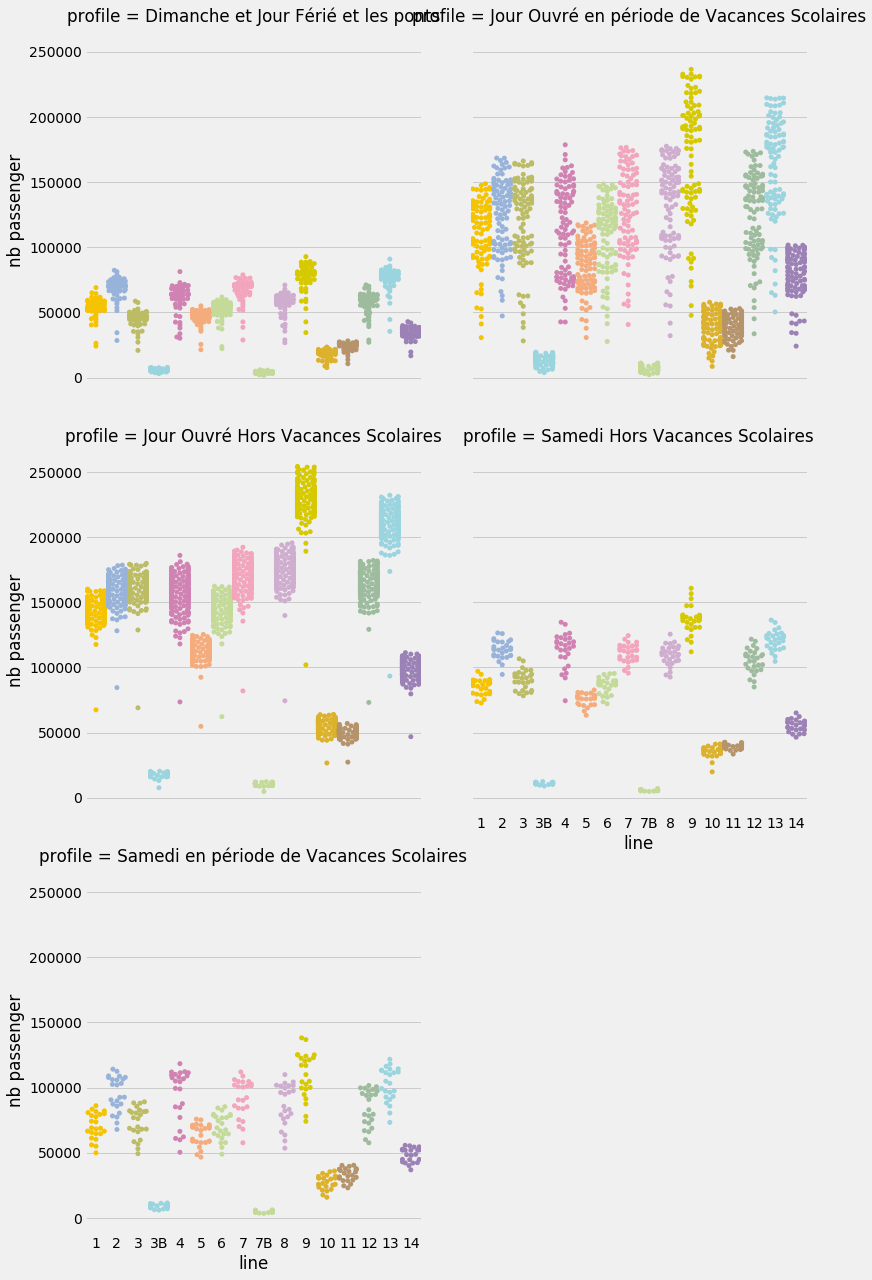

In [31]:
palette = sns.color_palette(colors)

ax=sns.factorplot(
    x='line',
    y='nb passenger',
    col='profile',
    order=order,
    data=line_day,
    palette=palette,
    kind='swarm',
    size=6,
    col_wrap=2
)


In [32]:
dataset.head()

,kind,date,stop,sem,profile,nbline,traffic_line,is_end,line,stop_lat,stop_lon
0,navigo,2017-03-17,mairie de montreuil,s1-2017,johv,1,16509.0,True,9,48.862283,2.441847
1,autre titre,2017-03-17,mairie de montreuil,s1-2017,johv,1,264.0,True,9,48.862283,2.441847
2,imagine r,2017-03-17,mairie de montreuil,s1-2017,johv,1,3283.0,True,9,48.862283,2.441847
3,tst,2017-03-17,mairie de montreuil,s1-2017,johv,1,1457.0,True,9,48.862283,2.441847
4,amethyste,2017-03-17,mairie de montreuil,s1-2017,johv,1,518.0,True,9,48.862283,2.441847


## Station popularity

In [33]:
#dataset.head()

### Yearly

In [34]:
(dataset.groupby('stop').sum()
 ['traffic_line']
 .sort_values(ascending=False)
 .head(10))

stop
saint-lazare              34376040.0
les halles                12290650.0
bastille                  9187284.0 
belleville                9092300.0 
place d'italie            8931491.0 
strasbourg-saint-denis    7904836.0 
gare du nord              7440791.0 
nation                    6939254.0 
place de clichy           6716027.0 
porte de clignancourt     6659485.0 
Name: traffic_line, dtype: float64

In [35]:
(dataset.groupby('stop').sum()
 ['traffic_line']
 .sort_values(ascending=False)
 .tail(10))

stop
vaneau              740749.0
botzaris            737641.0
saint-fargeau       562473.0
chardon-lagache     502612.0
danube              498702.0
porte d'auteuil     433208.0
bolivar             424286.0
buttes-chaumont     408055.0
pelleport           283532.0
eglise d'auteuil    134409.0
Name: traffic_line, dtype: float64

### Daily

In [36]:
daily_profile=(dataset[['kind','date','stop','traffic_line','profile']]
               .groupby(['date','stop','profile']).sum()
               .reset_index())

Most crowded day for each stop

In [37]:
top_daily = (daily_profile.loc[daily_profile.groupby('stop').traffic_line.idxmax()]
 .sort_values('traffic_line',ascending=False)
 .set_index('date'))

/home/khalid/.pyenv/versions/3.6.2/envs/paris_metro/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Most crowded day distribution')

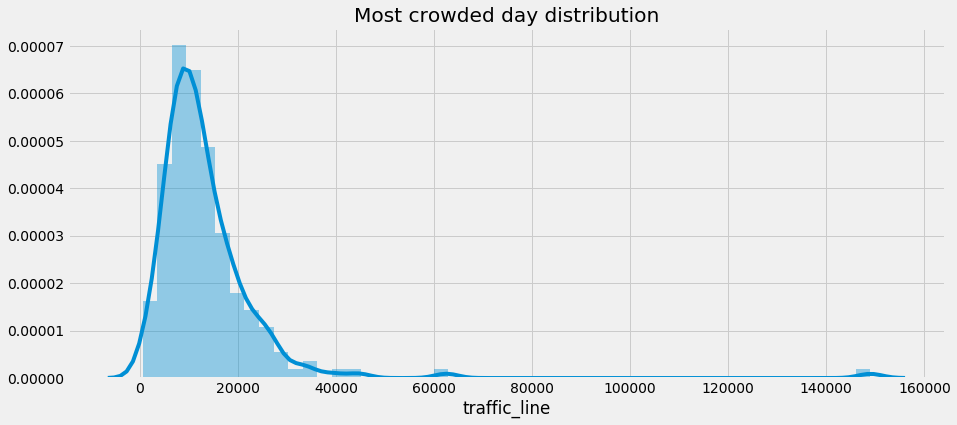

In [38]:
ax=sns.distplot(top_daily.traffic_line)
ax.set_title('Most crowded day distribution')

Most crowded

In [39]:
top_daily.head(10)

,stop,profile,traffic_line
date,,,
2017-12-12,saint-lazare,johv,148980.0
2017-12-08,les halles,johv,62528.0
2017-07-13,place d'italie,jovs,44640.0
2017-06-21,bastille,johv,39203.0
2017-02-24,belleville,johv,34482.0
2017-11-10,strasbourg-saint-denis,johv,33253.0
2017-05-04,gare du nord,jovs,31827.0
2017-10-20,nation,johv,28423.0
2017-12-12,marcel sembat,johv,27849.0


Least crowded 

In [40]:
top_daily.tail(10)

,stop,profile,traffic_line
date,,,
2017-11-30,saint-georges,johv,3764.0
2017-12-14,vaneau,johv,3390.0
2017-06-21,botzaris,johv,2901.0
2017-12-08,saint-fargeau,johv,2364.0
2017-12-07,chardon-lagache,johv,2319.0
2017-12-14,danube,johv,2308.0
2017-11-30,bolivar,johv,1963.0
2017-06-18,buttes-chaumont,dijfp,1738.0
2017-01-12,pelleport,johv,1341.0


In [41]:
dataset.head()

,kind,date,stop,sem,profile,nbline,traffic_line,is_end,line,stop_lat,stop_lon
0,navigo,2017-03-17,mairie de montreuil,s1-2017,johv,1,16509.0,True,9,48.862283,2.441847
1,autre titre,2017-03-17,mairie de montreuil,s1-2017,johv,1,264.0,True,9,48.862283,2.441847
2,imagine r,2017-03-17,mairie de montreuil,s1-2017,johv,1,3283.0,True,9,48.862283,2.441847
3,tst,2017-03-17,mairie de montreuil,s1-2017,johv,1,1457.0,True,9,48.862283,2.441847
4,amethyste,2017-03-17,mairie de montreuil,s1-2017,johv,1,518.0,True,9,48.862283,2.441847


In [42]:
dataset.head()

,kind,date,stop,sem,profile,nbline,traffic_line,is_end,line,stop_lat,stop_lon
0,navigo,2017-03-17,mairie de montreuil,s1-2017,johv,1,16509.0,True,9,48.862283,2.441847
1,autre titre,2017-03-17,mairie de montreuil,s1-2017,johv,1,264.0,True,9,48.862283,2.441847
2,imagine r,2017-03-17,mairie de montreuil,s1-2017,johv,1,3283.0,True,9,48.862283,2.441847
3,tst,2017-03-17,mairie de montreuil,s1-2017,johv,1,1457.0,True,9,48.862283,2.441847
4,amethyste,2017-03-17,mairie de montreuil,s1-2017,johv,1,518.0,True,9,48.862283,2.441847


In [43]:
dataset.head()

,kind,date,stop,sem,profile,nbline,traffic_line,is_end,line,stop_lat,stop_lon
0,navigo,2017-03-17,mairie de montreuil,s1-2017,johv,1,16509.0,True,9,48.862283,2.441847
1,autre titre,2017-03-17,mairie de montreuil,s1-2017,johv,1,264.0,True,9,48.862283,2.441847
2,imagine r,2017-03-17,mairie de montreuil,s1-2017,johv,1,3283.0,True,9,48.862283,2.441847
3,tst,2017-03-17,mairie de montreuil,s1-2017,johv,1,1457.0,True,9,48.862283,2.441847
4,amethyste,2017-03-17,mairie de montreuil,s1-2017,johv,1,518.0,True,9,48.862283,2.441847


In [44]:
def set_rank(group):
    group['profile_rank'] = group.traffic_line.rank(ascending=False)
    return group

daily_profile_ranking=(dataset.groupby(['stop','profile'])
 .mean().reset_index()
 .sort_values(['profile','traffic_line'],ascending=False)
 .groupby('profile').apply(set_rank)
).rename(columns={'traffic_line':'avg_daily_traffic_per_platform'})

In [45]:
daily_profile_ranking.head(20)

,stop,profile,nbline,avg_daily_traffic_per_platform,is_end,stop_lat,stop_lon,profile_rank
389,les halles,savs,1,4342.208333,False,48.862015,2.346495,1.0
664,porte de clignancourt,savs,1,2460.253623,True,48.897973,2.344007,2.0
824,saint-lazare,savs,4,2383.538194,True,48.875680,2.325437,3.0
349,la chapelle,savs,1,2376.583333,False,48.884391,2.359295,4.0
444,mairie de montreuil,savs,1,2042.625000,True,48.862283,2.441847,5.0
49,belleville,savs,2,1853.375000,False,48.872119,2.376763,6.0
709,porte de vincennes,savs,1,1778.277778,False,48.847019,2.410836,7.0
834,saint-michel,savs,1,1732.694444,False,48.853603,2.344015,8.0
554,olympiades,savs,1,1731.479167,True,48.826951,2.367057,9.0
919,villejuif-louis aragon,savs,1,1691.741007,True,48.786640,2.367129,10.0


/home/khalid/.pyenv/versions/3.6.2/envs/paris_metro/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


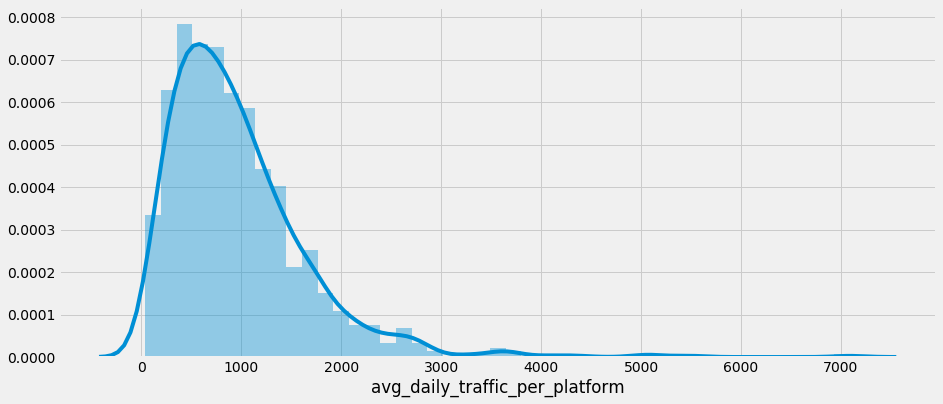

In [46]:
sns.distplot(daily_profile_ranking.avg_daily_traffic_per_platform)

In [47]:
daily_profile_ranking.to_excel('../data/processed/bi_daily_traffic.xlsx',index=False)

** Merge dataset for BI use**

In [48]:
df_profile = pd.read_feather('../data/processed/profile-2017.feather')

In [49]:
augmt = pd.merge(df_profile,daily_profile_ranking,on=['profile','stop']).dropna()
augmt.hour=augmt.hour.astype(int)

In [50]:
augmt.head()

,profile,stop,timespan,percentage,hour,sem,nbline,avg_daily_traffic_per_platform,is_end,stop_lat,stop_lon,profile_rank
0,dijfp,reuilly-diderot,15h-16h,8.93,15,s1-2017,2,506.927673,False,48.847288,2.386542,76.0
1,dijfp,reuilly-diderot,2h-3h,0.01,2,s1-2017,2,506.927673,False,48.847288,2.386542,76.0
2,dijfp,reuilly-diderot,6h-7h,1.15,6,s1-2017,2,506.927673,False,48.847288,2.386542,76.0
3,dijfp,reuilly-diderot,11h-12h,6.15,11,s1-2017,2,506.927673,False,48.847288,2.386542,76.0
4,dijfp,reuilly-diderot,1h-2h,0.11,1,s1-2017,2,506.927673,False,48.847288,2.386542,76.0


In [51]:
augmt.to_excel('../data/processed/bi_dataset.xlsx',index=False)

## Estimated traveler per hour

In [52]:
df_profil = pd.read_feather('../data/processed/profile-2017.feather')

In [53]:
df_profil = (df_profil
             .rename(columns={'cat_jour':'profile',
                             'libelle_arret':'stop'}))


In [54]:
group_key = ['kind' ,'date','stop','sem','profile']
daily=(dataset
       .drop_duplicates(group_key)
       .groupby(['date','stop','profile','sem'])
       .agg({'traffic_line':sum})
       .reset_index())

In [55]:
assert daily.query('stop=="bercy" and date =="2017-01-10"').shape[0] == 1

In [56]:
profile = df_profil[['stop','profile','hour','percentage','sem']]

In [57]:
merged = pd.merge(daily,profile,on=['stop','profile','sem']).dropna().drop(columns='sem')
merged['hourly_traffic'] = ((merged.traffic_line * merged.percentage)/100).round(0)
merged['hour'] = merged.hour.astype(int)

In [58]:
assert merged.query('date == "2017-01-01" and stop =="reuilly-diderot"').shape[0] == 24

In [59]:
#example
merged.query('date == "2017-04-28" and stop =="bercy"').sort_values('hour')

,date,stop,profile,traffic_line,hour,percentage,hourly_traffic
123193,2017-04-28,bercy,jovs,5315.5,0,1.25,66.0
123209,2017-04-28,bercy,jovs,5315.5,1,0.16,9.0
123214,2017-04-28,bercy,jovs,5315.5,2,0.01,1.0
123215,2017-04-28,bercy,jovs,5315.5,3,0.01,1.0
123198,2017-04-28,bercy,jovs,5315.5,4,0.00,0.0
123216,2017-04-28,bercy,jovs,5315.5,5,0.91,48.0
123206,2017-04-28,bercy,jovs,5315.5,6,1.87,99.0
123210,2017-04-28,bercy,jovs,5315.5,7,7.82,416.0
123207,2017-04-28,bercy,jovs,5315.5,8,11.07,588.0
123203,2017-04-28,bercy,jovs,5315.5,9,5.58,297.0


In [60]:
#example
merged.query('date == "2017-04-28" and stop =="bastille"').sort_values('hour')

,date,stop,profile,traffic_line,hour,percentage,hourly_traffic
120552,2017-04-28,bastille,jovs,11029.666667,0,2.87,317.0
120555,2017-04-28,bastille,jovs,11029.666667,1,0.51,56.0
120540,2017-04-28,bastille,jovs,11029.666667,2,0.03,3.0
120549,2017-04-28,bastille,jovs,11029.666667,3,0.01,1.0
120550,2017-04-28,bastille,jovs,11029.666667,4,0.01,1.0
120541,2017-04-28,bastille,jovs,11029.666667,5,0.31,34.0
120556,2017-04-28,bastille,jovs,11029.666667,6,0.63,69.0
120536,2017-04-28,bastille,jovs,11029.666667,7,1.88,207.0
120551,2017-04-28,bastille,jovs,11029.666667,8,6.30,695.0
120542,2017-04-28,bastille,jovs,11029.666667,9,5.73,632.0


In [61]:
#merged.query('hourly_traffic>1000')

/home/khalid/.pyenv/versions/3.6.2/envs/paris_metro/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


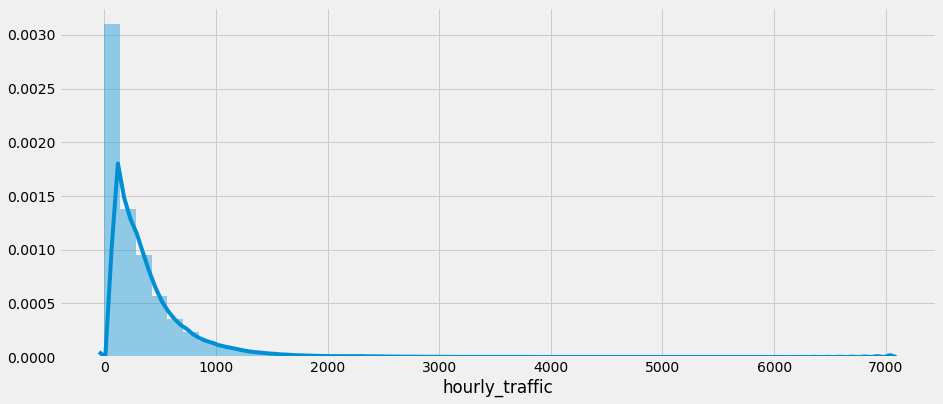

In [62]:
sns.distplot(merged.hourly_traffic)

In [63]:
merged.dtypes

date              datetime64[ns]
stop              object        
profile           object        
traffic_line      float64       
hour              int64         
percentage        float64       
hourly_traffic    float64       
dtype: object

In [64]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609394 entries, 0 to 1609799
Data columns (total 7 columns):
date              1609394 non-null datetime64[ns]
stop              1609394 non-null object
profile           1609394 non-null object
traffic_line      1609394 non-null float64
hour              1609394 non-null int64
percentage        1609394 non-null float64
hourly_traffic    1609394 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 98.2+ MB
